In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedMouseStudy_df = pd.merge(mouse_metadata_df,study_results_df, on=["Mouse ID"])

# Display the data table for preview
combinedMouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Check the number of mice.Unqiue
numberMiceUnique = combinedMouseStudy_df["Mouse ID"].nunique()
#Check the number of mice occurences over the dataset
numberMice = combinedMouseStudy_df["Mouse ID"].count()

print(f"Unique Mice: {numberMiceUnique}\nNumber of Mice Occurences: {numberMice}")

Unique Mice: 249
Number of Mice Occurences: 1893


In [30]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicateRows = combinedMouseStudy_df[combinedMouseStudy_df.duplicated(["Mouse ID", "Timepoint"])]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Drop any duplicate rows
cleanedMouseStudy_df = combinedMouseStudy_df[combinedMouseStudy_df["Mouse ID"] != "g989"]
cleanedMouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Recheck the number of mice
# Check the number of mice.Unqiue

numberMiceUnique = cleanedMouseStudy_df["Mouse ID"].nunique()
#Check the number of mice occurences over the dataset
numberMice = cleanedMouseStudy_df["Mouse ID"].count()

print(f"Unique Mice: {numberMiceUnique}\nNumber of Mice Occurences: {numberMice}")

Unique Mice: 248
Number of Mice Occurences: 1880


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summaryStats_df = cleanedMouseStudy_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summaryStats_df.columns = ["TumorVolume(mm3)_Mean","TumorVolume(mm3)_Median","TumorVolume(mm3)_Variance","TumorVolume(mm3)_STD","TumorVolume(mm3)_SEM"]
summaryStats_df = summaryStats_df.reset_index()
summaryStats_df

,Drug Regimen,TumorVolume(mm3)_Mean,TumorVolume(mm3)_Median,TumorVolume(mm3)_Variance,TumorVolume(mm3)_STD,TumorVolume(mm3)_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [34]:
#Groupby object to use for Bar Graph
regimenDataPoints = cleanedMouseStudy_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimenDataPoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

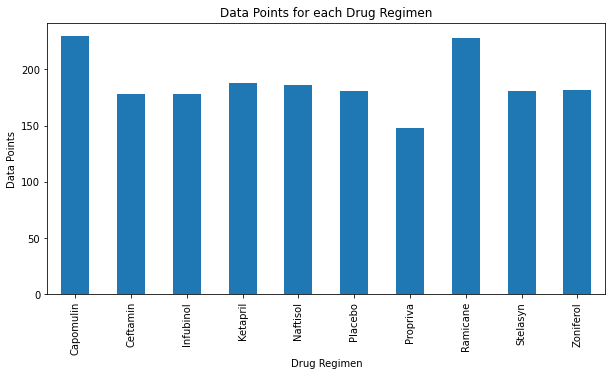

In [52]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
barRegimen = regimenDataPoints.plot.bar(figsize = (10,5), title = "Data Points for each Drug Regimen")

#Label the Chart
barRegimen.set_xlabel("Drug Regimen")
barRegimen.set_ylabel("Data Points")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

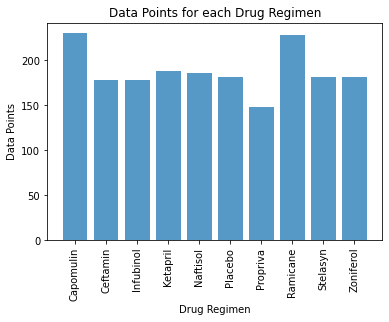

In [53]:
# Generate identical bar plot using pyplot instead of pandas.
plt.bar(summaryStats_df["Drug Regimen"],regimenDataPoints, alpha = 0.75, align = "center")

#Format the Bar Graph
plt.title("Data Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation = "vertical")


In [64]:
#Create Groupby object showing sex for each unique Mice
miceSex =  cleanedMouseStudy_df.groupby(["Sex"]).nunique()["Mouse ID"]

#Create a DataFrame using the previous GroupBy object for graphing
miceSex_df = pd.DataFrame(miceSex)
miceSex_df.columns = ["Total Count"]
miceSex_df["Percentage of Sex"] = ((miceSex_df["Total Count"] / miceSex_df["Total Count"].sum()) * 100)
miceSex_df

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


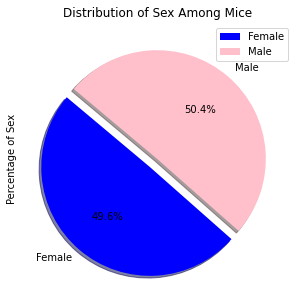

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Set the paramaters for the plot function
title = "Distribution of Sex Among Mice"
y_axis = "Percentage of Sex"
colors = ["blue", "pink"]
explode = (0.1, 0)

#Create 
miceSex_df.plot.pie(y = "Percentage of Sex",title = "Distribution of Sex Among Mice", figsize=(5,5), colors = colors, startangle = 140, explode = explode, shadow = True, autopct = "%1.1f%%")

(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

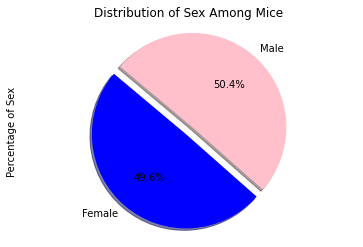

In [80]:
# Generate identical pie plot using pyplot
#Create Labels for the sections of the pie graph
labels = ["Female", "Male"]

#Create The Pie Graph
plt.pie(miceSex_df["Total Count"],labels = labels, explode = explode, colors = colors,startangle = 140, shadow = True, autopct = "%1.1f%%")

#Set Labels for the pie graph
plt.title("Distribution of Sex Among Mice")

#Set equal Axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [12]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights